In [3]:

%matplotlib inline

%cd /usr/src/app

# import os
# os.getcwd()


/usr/src/app


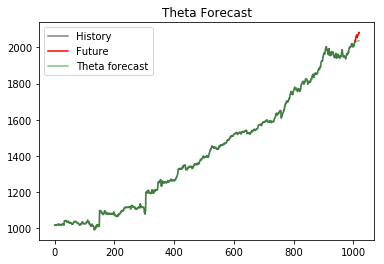

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from m4.data.dataset_extractor import M4DatasetExtractor, M4DatasetGroup

from m4.pipeline.forecaster.m4_baselines import theta as theta_forecaster


extractor = M4DatasetExtractor(dataset_path='/projects/eai-m4/dataset', group=M4DatasetGroup.daily)
train_dataset = extractor.training_set()
test_dataset =  extractor.test_set()


ts0_data = train_dataset[0].data.copy()
ts_test0_data = test_dataset[0].data.copy()

ts0_data.columns = ['History']
ax = ts0_data.plot(color='grey')
ts_test0_data.columns = ['Future']

ts_test0_data.index += len(ts0_data)  # shift the test data to the right
ts_test0_data.plot(ax=ax, color='red')


ts0 = train_dataset[0]
forecast = theta_forecaster.forecast(ts0)

forecast_data = forecast.data
forecast_data.reset_index(inplace=True, drop=True)
forecast_data.columns = ['Theta forecast']
forecast_data.plot(ax = ax, title='Theta Forecast',  color='green', alpha=0.5)

